In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #used to describe dependant and independant variable 
from sklearn.linear_model import Lasso #overcome overfitting , minimize the linear reression
from sklearn import metrics # check the model performance 
import numpy as np

In [2]:
cars_dataset=pd.read_csv("car data.csv")
cars_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#preprocessing : 
cars_dataset.isnull().sum() #to find the null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
cars_dataset.dropna(inplace=True) #to remove all null rows 

In [5]:
cars_dataset.shape #find rows and col

(301, 9)

In [6]:
cars_dataset.info() #used to find the info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
print(cars_dataset.Fuel_Type.value_counts()) #usec to find unique value in column
print(cars_dataset.Seller_Type.value_counts())
print(cars_dataset.	Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
cars_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2 }},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2660\3327796609.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2 }},inplace=True)


In [9]:
cars_dataset.head(6)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,1,Dealer,Manual,0


In [10]:
cars_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2660\1561434075.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [11]:
cars_dataset.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,Manual,0
6,ciaz,2015,6.75,8.12,18796,0,0,Manual,0
7,s cross,2015,6.50,8.61,33429,1,0,Manual,0


In [12]:
cars_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2660\2185615091.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [13]:
cars_dataset.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0


In [14]:
X=cars_dataset.drop(columns=['Car_Name','Selling_Price'],axis=1) #remove any column
Y=cars_dataset['Selling_Price']

In [15]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [18]:
lin_regr_model=LinearRegression()

In [19]:
lin_regr_model.fit(X_train,Y_train) #used to do calculation

LinearRegression()

In [20]:
training_data_pred=lin_regr_model.predict(X_train)

In [21]:
error_score=metrics.r2_score(Y_train,training_data_pred) #r2 score used to find the accuracy of the model 
print("R squared error : ",error_score)

R squared Error:  0.8799451660493698


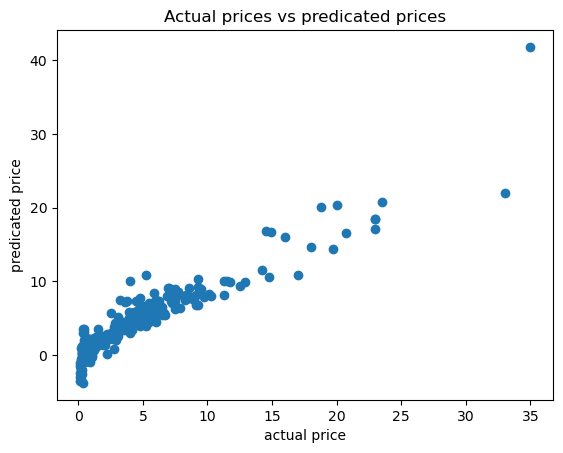

In [22]:
# visual price and predict
plt.scatter(Y_train,training_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicated price")
plt.title("Actual prices vs predicated prices")
plt.show()

In [23]:
test_data_pred=lin_regr_model.predict(X_test)

In [24]:
error_score=metrics.r2_score(Y_test,test_data_pred)
print("R squared Error: ",error_score)

R squared Error:  0.8365766715026903


In [25]:
print("predicted selling price:", lin_regr_model.predict(X_test.iloc[2].to_frame().T))
print("actual selling price:", Y_test.iloc[2])

predicted selling price: [4.26482324]
actual selling price: 4.75


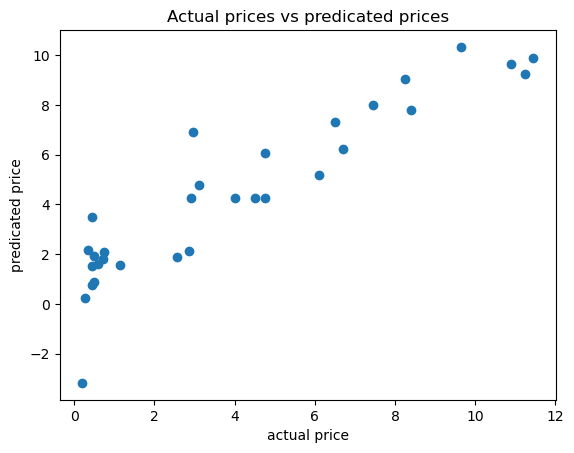

In [26]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicated price")
plt.title("Actual prices vs predicated prices")
plt.show()